In [1]:
import csv
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


from matplotlib import cm
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Let's just create a visualization function for easier life! :D
def show_graph(n, x, y):
    colors = cm.coolwarm(np.array(labels).astype(float) / n_clus)
    fig = plt.figure(figsize=(18, 18))
    plt.scatter(x, y, c=colors, s=100, alpha=0.5)
    plt.show()

In [3]:
FILE_NAME = '../data/dataset_diabetes/diabetic_data.csv'

# We need to clean the data first! :D
le = preprocessing.LabelEncoder()
df = pd.read_csv(FILE_NAME)
df = df.apply(le.fit_transform)
orig_df = df
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,134,10362,3,0,0,1,5,23,0,0,...,0,1,1,0,0,0,0,1,0,2
1,17,38209,3,0,1,1,0,0,6,2,...,0,3,1,0,0,0,0,0,1,1
2,11,52511,1,0,2,1,0,0,6,1,...,0,1,1,0,0,0,0,1,1,2
3,46,49787,3,1,3,1,0,0,6,1,...,0,3,1,0,0,0,0,0,1,2
4,2,32262,3,1,4,1,0,0,6,0,...,0,2,1,0,0,0,0,0,1,2


# Grouping the data

Let's try grouping the data first. Maybe something might make sense if we try to group the data.

For this part, we can use KMeans (unsupervised learning). We can also use GMMs or other clustering approach.

In [4]:
# Let's try out 5 clusters??
n_clus = 12
km = KMeans(n_clusters=n_clus, n_init=50, tol=1e-10, random_state=1234).fit(df)
labels = km.predict(df)
df['Label'] = labels
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Label
0,134,10362,3,0,0,1,5,23,0,0,...,1,1,0,0,0,0,1,0,2,8
1,17,38209,3,0,1,1,0,0,6,2,...,3,1,0,0,0,0,0,1,1,7
2,11,52511,1,0,2,1,0,0,6,1,...,1,1,0,0,0,0,1,1,2,7


# ARRGGHHHH HOW DO I GRAPH THIS DATA????? T___T 

If only I can choose which two columns affected the result the most and graph the label based on them T_T

**OH WAIT, I CAN!!!! HAHAHA**

In [5]:
clm = list(df)
print(df[clm].groupby(['Label']).mean())

       encounter_id   patient_nbr      race    gender       age    weight  \
Label                                                                       
0      71199.101202  35915.570335  2.696159  0.478676  6.160344  1.112394   
1      22856.545171   9424.228439  2.410014  0.454205  5.890502  1.050962   
2      35431.437935  19054.280696  2.259147  0.442649  6.081257  1.109203   
3      77312.671523  56272.352865  2.762814  0.448905  6.260494  1.179022   
4      94763.271211  63223.573880  2.810653  0.466158  6.225572  1.159795   
5      90161.953767  31810.676370  2.646958  0.483683  6.212732  1.144239   
6      38361.415446  57889.856328  2.754740  0.458301  6.214891  1.551256   
7      12647.710502  50850.085979  2.699075  0.471431  6.127154  1.761110   
8       7697.001854   8916.189838  2.537159  0.469582  5.778733  1.047101   
9      59165.118806  21737.584454  2.322527  0.455148  6.061153  1.140910   
10     58123.787004  57278.392564  2.684025  0.448628  6.188834  1.178865   

**HMMMM Not very helpful lol, I thought by looking at the mean for each feature, I can see which features are relevant based on their values**

We can still try anyway??? Lets pick `encounter_id` and `patient_nbr`.

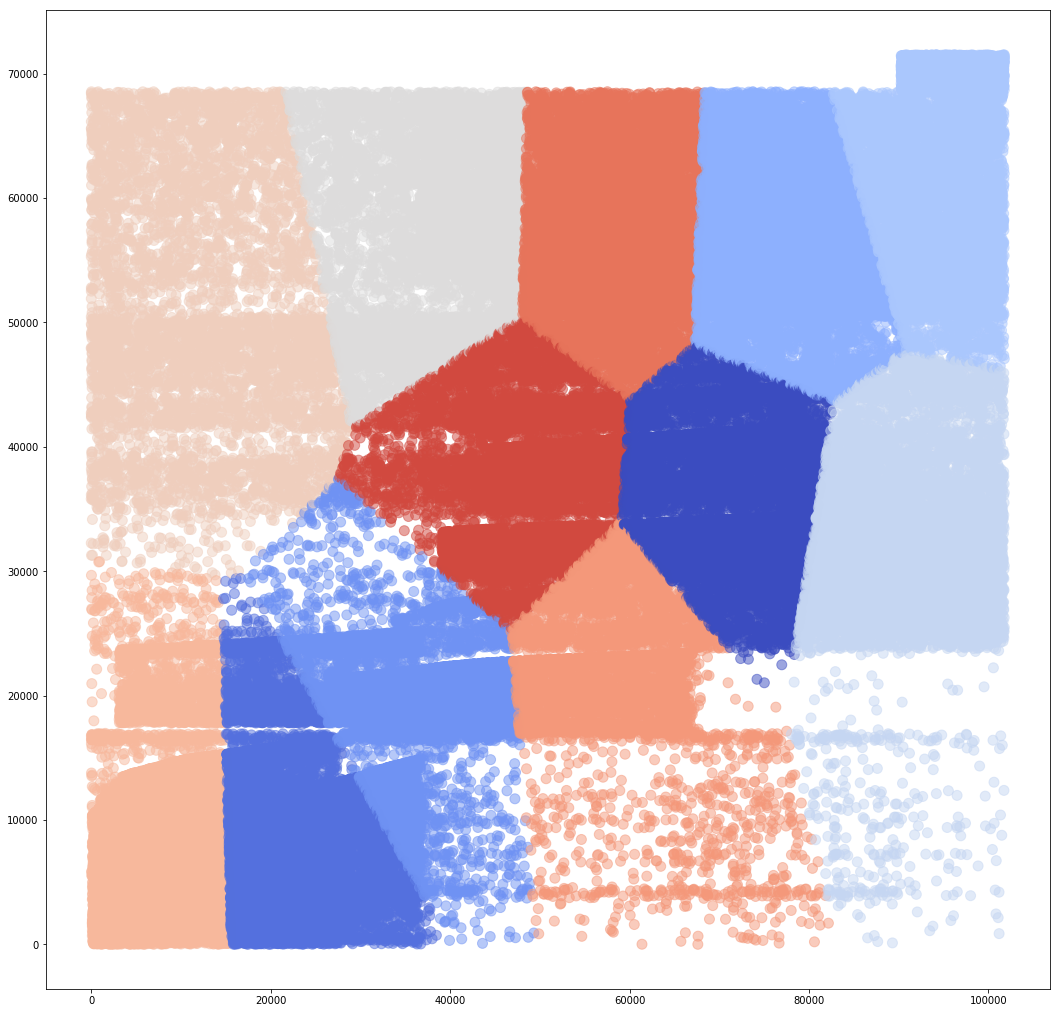

In [6]:
show_graph(n_clus, df['encounter_id'], df['patient_nbr'])
# LOL Looks like some painting


## Maybe we should first choose our K???

Let's perform silhouette score!

Seems like k=12 shoud be okay??
```
For k=3, the score is 0.43608144537313465
For k=4, the score is 0.44022638878527914
For k=5, the score is 0.4379464743506894
For k=6, the score is 0.43489337793034033
For k=7, the score is 0.4112913237706559
For k=8, the score is 0.41248333877718335
For k=9, the score is 0.3991669291008952
For k=10, the score is 0.3860249631169659
For k=11, the score is 0.3790975646646471
For k=12, the score is 0.37254284126252263
For k=13, the score is 0.37216367433388714
For k=14, the score is 0.3782694996603581
For k=15, the score is 0.38041127260635493
For k=16, the score is 0.3739997603413672
For k=17, the score is 0.37654359778374713
For k=18, the score is 0.3722767228427836
```

In [23]:
df2 = orig_df.drop('Label', 1)
pca = PCA(n_components=3).fit(df2)
x_new = pca.transform(df2)

n_clus = 12
km2 = KMeans(n_clusters=n_clus, n_init=50, tol=1e-10, random_state=1234).fit(x_new)
labels2 = km2.predict(x_new)

In [24]:
h = ['l1', 'l2', 'l3']
dp = pd.DataFrame(x_new, columns=h)

In [26]:
dp['Labels'] = labels2

In [47]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.scatter(dp['Label'], dp['l2'], dp['l3'], c='r', marker='o')
plt.show()

AttributeError: 'NoneType' object has no attribute 'scatter'

<Figure size 432x288 with 0 Axes>